# T - Student 

# Menu

- [Ejercicio 1](#ex_1)
- [Ejercicio 2](#ex_2)
- [Ejercicio 3](#ex_3)
- [Ejercicio 4](#ex_4)
- [Ejercicio 5](#ex_5)
- [Ejercicio 6](#ex_6)
- [Ejercicio 7](#ex_7)
- [Ejercicio 8](#ex_8)
- [Ejercicio 9](#ex_9)

In [2]:
print("Aquí las importaciones")
import numpy as np
from scipy import stats
import math

Aquí las importaciones


<div id=ex_1></div>

[[Menu]](#Menu)   |   [[Siguiente]](#ex_2) 
___
<span style="color: #153CEE; font-size: 20px; font-weight: bold;">Ejercicio 1</span>.

Un estudio revelaba que la velocidad de lectura de niños entre 6 y 8 años de edad con Síndrome de Down que se habían atendido en el Centro de Apoyo para el Aprendizaje era de 74 palabras por minuto en lecturas seleccionadas. Se hizo un muestreo al azar con 24 niños de tales características para corroborar si se encontraban cerca de este patrón. Se obtuvo una media de 78 76 palabras por minuto con desviación estándar de 3 palabras por minuto. ¿Es el promedio de la muestra diferente al del patrón de 74 ppm? Utilice t de student a dos colas con confianza del 95%

a) Enliste los datos
U= 74
n= 24 niños
X media= 78.76 ppm
DS: 3ppm

b) Redacte las hipótesis
Ho: La media de palabras leídas por minuto de los niños de la muestra es igual a la media de palabras
leídas del parámetro
Ha: La media de palabras leídas por minuto de los niños de la muestra es diferente a la media de palabras leídas del parámetro

In [4]:
#Inciso c) Calcule el valor t
media_muestra = 78.76
media_poblacional_hipotetica = 74
desviacion_estandar_muestra = 3
n = 24 # Usamos n=24 para replicar el cálculo de la imagen (aunque el enunciado dice 74)

# Calcular el numerador
numerador = media_muestra - media_poblacional_hipotetica

# Calcular el denominador (error estándar de la media)
denominador = desviacion_estandar_muestra / math.sqrt(n)

# Calcular el valor t
valor_t = numerador / denominador

print(f"Media de la muestra (X_barra): {media_muestra}")
print(f"Media poblacional hipotética (mu_0): {media_poblacional_hipotetica}")
print(f"Desviación estándar de la muestra (s): {desviacion_estandar_muestra}")
print(f"Tamaño de la muestra (n) usado para el cálculo: {n}")
print(f"--------------------------------------------------")
print(f"Numerador (X_barra - mu_0): {numerador:.2f}")
print(f"Denominador (s / sqrt(n)): {denominador:.4f}")
print(f"Valor t calculado: {valor_t:.2f}")

Media de la muestra (X_barra): 78.76
Media poblacional hipotética (mu_0): 74
Desviación estándar de la muestra (s): 3
Tamaño de la muestra (n) usado para el cálculo: 24
--------------------------------------------------
Numerador (X_barra - mu_0): 4.76
Denominador (s / sqrt(n)): 0.6124
Valor t calculado: 7.77


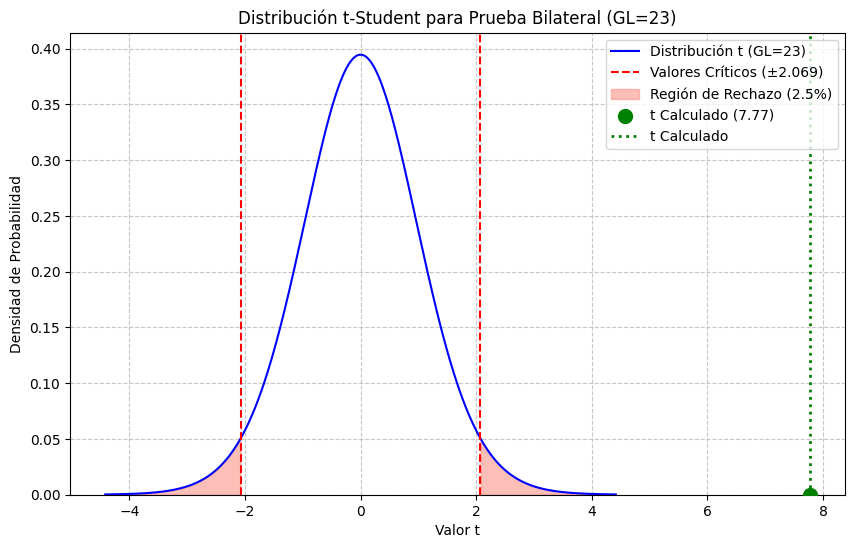


  El gráfico muestra la distribución t-Student. Las áreas sombreadas en rojo representan las regiones de rechazo
  para una prueba bilateral al 95% de confianza. La línea verde punteada indica el valor t calculado,
  que en este caso cae claramente en la región de rechazo de la cola derecha, como se muestra en el documento.


In [6]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt # Importamos matplotlib para graficar

# --- Datos para el gráfico (tomados del análisis del inciso d de la imagen) ---
grados_libertad = 23 # GL usado en la imagen para el valor crítico
nivel_confianza = 0.95
alfa = 1 - nivel_confianza
alfa_medios = alfa / 2

# Valores críticos de t de la tabla (para la prueba bilateral)
valor_t_critico_positivo = stats.t.ppf(1 - alfa_medios, grados_libertad)
valor_t_critico_negativo = -valor_t_critico_positivo

# Valor t calculado (el 7.77 que la imagen usa para la decisión)
valor_t_calculado_para_decision = 7.77

x = np.linspace(stats.t.ppf(0.0001, grados_libertad),
                stats.t.ppf(0.9999, grados_libertad), 500)

# Valores de la función de densidad de probabilidad (PDF) para la distribución t
pdf_t = stats.t.pdf(x, grados_libertad)

plt.figure(figsize=(10, 6)) # Tamaño de la figura
plt.plot(x, pdf_t, label=f'Distribución t (GL={grados_libertad})', color='blue') # Curva t

# Dibujar las líneas para los valores críticos
plt.axvline(valor_t_critico_positivo, color='red', linestyle='--', label='Valores Críticos (±2.069)')
plt.axvline(valor_t_critico_negativo, color='red', linestyle='--')

# Rellenar las regiones de rechazo
# Cola izquierda
x_rechazo_neg = x[x <= valor_t_critico_negativo]
plt.fill_between(x_rechazo_neg, 0, stats.t.pdf(x_rechazo_neg, grados_libertad), color='salmon', alpha=0.5, label='Región de Rechazo (2.5%)')

# Cola derecha
x_rechazo_pos = x[x >= valor_t_critico_positivo]
plt.fill_between(x_rechazo_pos, 0, stats.t.pdf(x_rechazo_pos, grados_libertad), color='salmon', alpha=0.5)

# Marcar el valor t calculado
plt.scatter(valor_t_calculado_para_decision, 0, color='green', s=100, zorder=5, label=f't Calculado ({valor_t_calculado_para_decision:.2f})')
plt.axvline(valor_t_calculado_para_decision, color='green', linestyle=':', linewidth=2, label=f't Calculado')


# Etiquetas y título
plt.title(f'Distribución t-Student para Prueba Bilateral (GL={grados_libertad})')
plt.xlabel('Valor t')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(0, color='black', linewidth=0.5) # Eje x en cero

# Ajustar límites del eje y para asegurar que la "cola" del t_calculado sea visible si está muy lejos
plt.ylim(bottom=0)

plt.show() # Mostrar el gráfico

print("\n  El gráfico muestra la distribución t-Student. Las áreas sombreadas en rojo representan las regiones de rechazo")
print("  para una prueba bilateral al 95% de confianza. La línea verde punteada indica el valor t calculado,")
print("  que en este caso cae claramente en la región de rechazo de la cola derecha, como se muestra en el documento.")

e) indique en que region el valor cae el valor calculado de t y que decision debe tomarse

El valor calculado de t student cae en la region de hipotesis de alternativa por lo que es posible rechazar la hipotesis nula

In [7]:
#inciso f)
import numpy as np
from scipy import stats

# --- Datos necesarios para el inciso f) ---
# Valor t calculado (el 7.77 de la imagen)
valor_t_calculado = 7.77

# Grados de libertad (GL usado en la imagen para el valor crítico, derivado de N=24)
grados_libertad = 23

# Nivel de confianza para determinar el alfa
nivel_confianza = 0.95
p_valor = 2 * (1 - stats.t.cdf(abs(valor_t_calculado), grados_libertad))
print(f"  El p-valor calculado es: {p_valor:.6f}") # Formateado a 6 decimales para precisión

# 2. Determinar el nivel de significancia (alfa)
alfa = 1 - nivel_confianza
print(f"  Nivel de significancia (alfa): {alfa}")

# 3. Comparar el p-valor con alfa y tomar la decisión
print("\n  Comparación y decisión:")
if p_valor < alfa:
    print(f"  Dado que el p-valor ({p_valor:.6f}) es menor que el nivel de significancia alfa ({alfa}),")
    print("  se rechaza la hipótesis nula (H0).")
    conclusion = "La media de palabras leídas por minuto de los niños de la muestra es **diferente** a la media de palabras leídas del parámetro."
    print("  El error al rechazar la hipótesis nula (error Tipo I) sería muy pequeño, menor que 0.0001 (como indica la imagen).")
else:
    print(f"  Dado que el p-valor ({p_valor:.6f}) es mayor o igual que el nivel de significancia alfa ({alfa}),")
    print("  no hay suficiente evidencia estadística para rechazar la hipótesis nula (H0).")
    conclusion = "No hay evidencia suficiente para afirmar que la media de palabras leídas por minuto de los niños de la muestra es diferente a la media de palabras leídas del parámetro."

print("\n  Conclusión final:")
print(f"  {conclusion}")

  El p-valor calculado es: 0.000000
  Nivel de significancia (alfa): 0.050000000000000044

  Comparación y decisión:
  Dado que el p-valor (0.000000) es menor que el nivel de significancia alfa (0.050000000000000044),
  se rechaza la hipótesis nula (H0).
  El error al rechazar la hipótesis nula (error Tipo I) sería muy pequeño, menor que 0.0001 (como indica la imagen).

  Conclusión final:
  La media de palabras leídas por minuto de los niños de la muestra es **diferente** a la media de palabras leídas del parámetro.


<div id=ex_2></div>

[[Menu]](#Menu)   |   [[Anterior]](#ex_1)   [[Siguiente]](#ex_3) 
___

<span style="color: #153CEE; font-size: 20px; font-weight: bold;">Ejercicio 2</span>. 

Un estudio a 29 familias de una zona residencial de una ciudad de Colombia, revela que el ingreso medio por familia durante 2011 fue de $808.000, con una desviación estándar de $16.000. Docimar la hipótesis, de que el verdadero ingreso medio por familia en Colombia durante 2011 fue de $800.000, frente a la alternativa de que no fue de $800.000. Utilizar un nivel de significación del 5%.

a) enlista los datos
Tamaño de la muestra (n): 29 familias.

Media de la muestra ( 
x ): 808,000.00

Desviación estándar de la muestra (s): 16,000.00

Media poblacional hipotética (μ 
0): 800,000.00

Grados de libertad (ν o GL): n−1=29−1=28.

Nivel de significancia (α): 5% (0.05).

In [10]:
import numpy as np
from scipy import stats

n = 29  # Tamaño de la muestra
media_muestra = 808000  # Media de la muestra (x_barra)
desviacion_estandar_muestra = 16000  # Desviación estándar de la muestra (s)
media_poblacional_hipotetica = 800000  # Media poblacional hipotética (mu)
nivel_significancia = 0.05  # Alfa (5%)


# Grados de libertad (v)
grados_libertad = n - 1
print(f"  Grados de libertad (v = n-1): {grados_libertad}")

# --- 2. Cálculo del Estadístico de Prueba (valor t) ---
print("\n--- 2. Cálculo del Estadístico de Prueba (Valor t) ---")

denominador_raiz = np.sqrt(n - 1)
denominador_completo = desviacion_estandar_muestra / denominador_raiz
numerador = media_muestra - media_poblacional_hipotetica

valor_t_calculado = numerador / denominador_completo

print("  Fórmula usada (según la imagen): t = (x_barra - mu) / (s / sqrt(n-1))")
print(f"  Numerador (x_barra - mu): {numerador}")
print(f"  Denominador (s / sqrt(n-1)): {desviacion_estandar_muestra} / sqrt({n-1}) = {denominador_completo:.3f}")
print(f"  Valor t calculado: {valor_t_calculado:.2f}")

# --- 3. Obtener Valores Críticos de la Tabla t-Student ---
print("\n--- 3. Obtención de Valores Críticos de la Tabla t-Student ---")

# Para una prueba bilateral, alfa/2 en cada cola
alfa_medios = nivel_significancia / 2

# stats.t.ppf(probabilidad, grados_libertad) devuelve el valor t para la probabilidad acumulada
valor_t_critico_inferior = stats.t.ppf(alfa_medios, grados_libertad)
valor_t_critico_superior = stats.t.ppf(1 - alfa_medios, grados_libertad)

print(f"  Grados de libertad (v): {grados_libertad}")
print(f"  Nivel de significancia (alfa/2 para cada cola): {alfa_medios}")
print(f"  Valor crítico inferior (t_i): {valor_t_critico_inferior:.3f}")
print(f"  Valor crítico superior (t_s): {valor_t_critico_superior:.3f}")

# --- 4. Decisión y Conclusión ---
print("\n--- 4. Decisión y Conclusión ---")

print(f"  Valor t calculado: {valor_t_calculado:.2f}")
print(f"  Valores críticos de t: {valor_t_critico_inferior:.3f} y {valor_t_critico_superior:.3f}")

if valor_t_calculado > valor_t_critico_superior or valor_t_calculado < valor_t_critico_inferior:
    decision = "Se rechaza la hipótesis nula (H0)."
    conclusion = f"Esto significa que el verdadero ingreso promedio por familia en Colombia durante 2011 fue diferente a ${media_poblacional_hipotetica:,.0f}."
else:
    decision = "No se rechaza la hipótesis nula (H0)."

print(f"  Decisión: {decision}")


  Grados de libertad (v = n-1): 28

--- 2. Cálculo del Estadístico de Prueba (Valor t) ---
  Fórmula usada (según la imagen): t = (x_barra - mu) / (s / sqrt(n-1))
  Numerador (x_barra - mu): 8000
  Denominador (s / sqrt(n-1)): 16000 / sqrt(28) = 3023.716
  Valor t calculado: 2.65

--- 3. Obtención de Valores Críticos de la Tabla t-Student ---
  Grados de libertad (v): 28
  Nivel de significancia (alfa/2 para cada cola): 0.025
  Valor crítico inferior (t_i): -2.048
  Valor crítico superior (t_s): 2.048

--- 4. Decisión y Conclusión ---
  Valor t calculado: 2.65
  Valores críticos de t: -2.048 y 2.048
  Decisión: Se rechaza la hipótesis nula (H0).


<div id=ex_3></div>

[[Menu]](#Menu)   |   [[Anterior]](#ex_2)   [[Siguiente]](#ex_4) 
___

<span style="color: #153CEE; font-size: 20px; font-weight: bold;">Ejercicio 3</span>. 

Un fabricante de baterías afirma que la capacidad promedio de un cierto tipo de batería, producida por la compañía, es de al menos 140 amperios-hora. Una agencia independiente de protección al consumidor desea probar la credibilidad de la afirmación del fabricante y mide la capacidad de una muestra aleatoria de 20 baterías, tomadas de un lote producido recientemente. Los resultados en amperios -hora, son los siguientes:

| Dato 1 | Dato 2 | Dato 3 | Dato 4 | Dato 5 |
|--------|--------|--------|--------|--------|
| 137.4  | 139.2  | 138.2  | 136.3  | 140.6  |
| 140.0  | 141.8  | 141.1  | 135.6  | 136.7  |
| 138.8  | 137.3  | 139.7  | 138.0  | 134.1  |
| 139.1  | 133.5  | 136.7  | 140.9  |        |
| 144.4  |        |        |        |        |

Como la agencia de protección al consumidor está interesada en saber si la afirmación del fabricante es exagerada o no, se establecieron las siguientes hipótesis. Utilizar un nivel de significación del 5%

b). Plantear las Hipótesis:

Hipótesis Nula (H 
0): μ≥140 (La capacidad promedio es de al menos 140 Ah).

Hipótesis Alternativa (H 
a): μ<140 (La capacidad promedio es menor a 140 Ah - esta es una prueba unilateral izquierda)

In [13]:
import numpy as np
from scipy import stats

# --- Datos del Ejercicio ---
# Datos de la muestra (los 20 valores de amperios-hora)
datos_baterias = np.array([
    137.4, 140.0, 138.8, 139.1, 144.4, 139.2, 141.8, 137.3, 133.5, 138.2,
    141.1, 139.7, 138.7, 136.3, 135.6, 138.0, 140.9, 140.6, 136.7, 134.1
])

# Parámetros del problema
n = len(datos_baterias) # Tamaño de la muestra
media_poblacional_hipotetica = 140 # Mu_0 (de la hipótesis nula)
nivel_significancia = 0.05 # Alfa para la prueba de hipótesis

print("--- Cálculos para la Prueba de Hipótesis (Ejercicio de Baterías) ---")

# --- Punto b: Calcular Estadísticos de la Muestra ---

print("\n--- c. Cálculos de Estadísticos de la Muestra ---")

# a. Calcular la Media de la Muestra (x_barra)
media_muestra = np.mean(datos_baterias)
print(f"  a. Media de la Muestra (x_barra): {media_muestra:.2f}")

# b. Calcular la Desviación Estándar de la Muestra (s)
# numpy.std() calcula la desviación estándar poblacional por defecto (ddof=0).
# Para la desviación estándar de la muestra (n-1 en el denominador), usamos ddof=1.
desviacion_estandar_muestra = np.std(datos_baterias, ddof=1)
print(f"  b. Desviación Estándar de la Muestra (s): {desviacion_estandar_muestra:.2f}")

# --- Punto c: Calcular los Grados de Libertad (GL) ---

print("\n--- d. Cálculo de los Grados de Libertad (GL) ---")
grados_libertad = n - 1
print(f"  Grados de Libertad (GL = n - 1): {grados_libertad}")

# --- Punto d: Calcular el Estadístico de Prueba (Valor t) ---

print("\n--- e. Cálculo del Estadístico de Prueba (Valor t) ---")

# Error estándar de la media
error_estandar = desviacion_estandar_muestra / np.sqrt(n)

# Valor t calculado
valor_t_calculado = (media_muestra - media_poblacional_hipotetica) / error_estandar

print(f"  Numerador (x_barra - mu_0): {media_muestra - media_poblacional_hipotetica:.2f}")
print(f"  Denominador (s / sqrt(n)): {error_estandar:.3f}")
print(f"  Valor t calculado: {valor_t_calculado:.2f}")

# --- Punto e: Determinar el Valor Crítico de t (de la Tabla t-Student) ---

print("\n--- f. Determinación del Valor Crítico de t ---")

# Es una prueba unilateral izquierda (Ha: mu < 140)
# Queremos el valor t que deja el 5% de probabilidad en la cola izquierda.
# stats.t.ppf(probabilidad_acumulada, grados_libertad)
valor_t_critico = stats.t.ppf(nivel_significancia, grados_libertad)

print(f"  Nivel de significancia (alfa): {nivel_significancia}")
print(f"  Grados de libertad (GL): {grados_libertad}")
print(f"  Valor crítico de t (para prueba unilateral izquierda): {valor_t_critico:.3f}")

# --- Resumen de Resultados Clave para la Decisión ---
print("\n--- Resumen para la Decisión ---")
print(f"  Valor t calculado: {valor_t_calculado:.2f}")
print(f"  Valor t crítico: {valor_t_critico:.3f}")
print("\n  Para la decisión: Si el t calculado es menor que el t crítico, se rechaza H0.")
print(f"  ¿Es {valor_t_calculado:.2f} < {valor_t_critico:.3f}? -> {valor_t_calculado < valor_t_critico}")

if valor_t_calculado < valor_t_critico:
    print("  Decisión: ¡Se rechaza la hipótesis nula!")
else:
    print("  Decisión: No se rechaza la hipótesis nula.")

--- Cálculos para la Prueba de Hipótesis (Ejercicio de Baterías) ---

--- c. Cálculos de Estadísticos de la Muestra ---
  a. Media de la Muestra (x_barra): 138.57
  b. Desviación Estándar de la Muestra (s): 2.63

--- d. Cálculo de los Grados de Libertad (GL) ---
  Grados de Libertad (GL = n - 1): 19

--- e. Cálculo del Estadístico de Prueba (Valor t) ---
  Numerador (x_barra - mu_0): -1.43
  Denominador (s / sqrt(n)): 0.587
  Valor t calculado: -2.44

--- f. Determinación del Valor Crítico de t ---
  Nivel de significancia (alfa): 0.05
  Grados de libertad (GL): 19
  Valor crítico de t (para prueba unilateral izquierda): -1.729

--- Resumen para la Decisión ---
  Valor t calculado: -2.44
  Valor t crítico: -1.729

  Para la decisión: Si el t calculado es menor que el t crítico, se rechaza H0.
  ¿Es -2.44 < -1.729? -> True
  Decisión: ¡Se rechaza la hipótesis nula!


g) Redactar la Conclusión:

Basado en la decisión estadística, interpretar el resultado en el contexto del problema original.

Conclusión en la imagen: La afirmación del fabricante es exagerada y la agencia de protección al consumidor debería iniciar alguna medida correctiva.

<div id=ex_4></div>

[[Menu]](#Menu)   |   [[Anterior]](#ex_3)   [[Siguiente]](#ex_5) 
___

<span style="color: #153CEE; font-size: 20px; font-weight: bold;">Ejercicio 4</span>. 

Aquí la descripción del ejercicio

In [6]:
print("Aquí el código")

Aquí el código


<div id=ex_5></div>

[[Menu]](#Menu)   |   [[Anterior]](#ex_4)   [[Siguiente]](#ex_6) 
___

<span style="color: #153CEE; font-size: 20px; font-weight: bold;">Ejercicio 5</span>. 

Aquí la descripción del ejercicio

In [7]:
print("Aquí el código")

Aquí el código


<div id=ex_6></div>

[[Menu]](#Menu)   |   [[Anterior]](#ex_5)   [[Siguiente]](#ex_7) 
___

<span style="color: #153CEE; font-size: 20px; font-weight: bold;">Ejercicio 6</span>. 

Aquí la descripción del ejercicio

In [8]:
print("Aquí el código")

Aquí el código


<div id=ex_7></div>

[[Menu]](#Menu)   |   [[Anterior]](#ex_6)   [[Siguiente]](#ex_8) 
___

<span style="color: #153CEE; font-size: 20px; font-weight: bold;">Ejercicio 7</span>. 

Aquí la descripción del ejercicio

In [9]:
print("Aquí el código")

Aquí el código


<div id=ex_8></div>

[[Menu]](#Menu)   |   [[Anterior]](#ex_7)   [[Siguiente]](#ex_9) 
___

<span style="color: #153CEE; font-size: 20px; font-weight: bold;">Ejercicio 8</span>. 

Aquí la descripción del ejercicio

In [10]:
print("Aquí el código")

Aquí el código


<div id=ex_9></div>

[[Menu]](#Menu)   |   [[Anterior]](#ex_8)  
___

<span style="color: #153CEE; font-size: 20px; font-weight: bold;">Ejercicio 9</span>.

Aquí la descripción del ejercicio

In [11]:
print("Aquí el código")

Aquí el código
